In [1]:
using Clustering, RDatasets, Distances, SpectralClustering, Plots, CategoricalArrays
function distance(data) #computes pairwise Euclidean distances
    return pairwise(SqEuclidean(), data, dims=2);
end
function Gs(x, s) #applies Gaussian similarity function to data
    return exp(-x/2s^2)
end
function knn(W, x, k)
    v = deepcopy(W[x,:]) 
    sp = sortperm(v) #sorts indices of vertices by distance
    return sp[2:k+1] #takes k closest neighbors
end
data = dataset("cluster", "ruspini")
#data = levelcode.(data[:,[2,3]])
data = Matrix(data[:,[1,2]])'
Dt = distance(data)
S = Gs.(Dt,10)

75×75 Matrix{Float64}:
 1.0          0.603506     0.697676     …  8.09318e-12  1.08141e-9
 0.603506     1.0          0.814647        1.06825e-12  1.19226e-10
 0.697676     0.814647     1.0             8.92125e-11  6.94669e-9
 0.0495388    0.346456     0.196912        6.11773e-14  4.31036e-12
 0.615697     0.272532     0.579842        5.46446e-9   3.69912e-7
 0.185444     0.606531     0.579842     …  2.02068e-11  1.11993e-9
 0.00158844   0.0343896    0.0146253       1.34148e-15  6.66048e-14
 0.0485578    0.29523      0.245367        5.50701e-12  2.44942e-10
 0.272532     0.421052     0.71177         5.17203e-9   2.08151e-7
 0.158025     0.367879     0.557106        2.45534e-9   8.76425e-8
 0.0218184    0.128735     0.158025     …  3.5997e-10   9.23745e-9
 0.0116786    0.0593087    0.101266        8.96444e-9   1.57317e-7
 0.00398587   0.0305009    0.0466538       2.50494e-9   3.89885e-8
 ⋮                                      ⋱               
 6.44585e-11  1.53883e-12  1.40614e-10     0.

In [2]:
(n,n) = size(S)
W = zeros(n,n)
for i=1:n, j=1:n
    if (i in knn(Dt, j, 5) || j in knn(Dt, i, 5))
        W[i,j] = S[i,j]
        W[j,i] = S[j,i]
    end
end
W

75×75 Matrix{Float64}:
 0.0       0.603506  0.697676  0.0       …  0.0       0.0       0.0
 0.603506  0.0       0.814647  0.346456     0.0       0.0       0.0
 0.697676  0.814647  0.0       0.0          0.0       0.0       0.0
 0.0       0.346456  0.0       0.0          0.0       0.0       0.0
 0.615697  0.0       0.579842  0.0          0.0       0.0       0.0
 0.185444  0.606531  0.579842  0.67032   …  0.0       0.0       0.0
 0.0       0.0       0.0       0.522046     0.0       0.0       0.0
 0.0       0.0       0.0       0.818731     0.0       0.0       0.0
 0.272532  0.421052  0.71177   0.0          0.0       0.0       0.0
 0.0       0.367879  0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.410656  …  0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 ⋮                                       ⋱                      
 0.0       0.0       0.0    

In [3]:
D = zeros(n,n); #D = degree matrix
for i = 1:n
    D[i,i] = sum(W[i,:])
end
D #D = degree matrix

75×75 Matrix{Float64}:
 2.37486  0.0      0.0      0.0      …  0.0      0.0      0.0      0.0
 0.0      3.16007  0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      3.38378  0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      2.76821     0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0      …  0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0      …  0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 ⋮                                   ⋱                

In [4]:
L = D-W #L = Laplacian Matrix

75×75 Matrix{Float64}:
  2.37486   -0.603506  -0.697676  …   0.0        0.0        0.0
 -0.603506   3.16007   -0.814647      0.0        0.0        0.0
 -0.697676  -0.814647   3.38378       0.0        0.0        0.0
  0.0       -0.346456   0.0           0.0        0.0        0.0
 -0.615697   0.0       -0.579842      0.0        0.0        0.0
 -0.185444  -0.606531  -0.579842  …   0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
 -0.272532  -0.421052  -0.71177       0.0        0.0        0.0
  0.0       -0.367879   0.0           0.0        0.0        0.0
  0.0        0.0        0.0       …   0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  ⋮                               ⋱                        
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0     

In [5]:
using LinearAlgebra
valL,vecL = eigen(L)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
75-element Vector{Float64}:
 -7.105427357601002e-15
 -1.7763568394002505e-15
 -8.881784197001252e-16
  1.7763568394002505e-14
  0.16496499055784852
  0.4758298120900548
  0.6849822414053577
  0.7346689415312273
  0.8483873271283677
  1.040677150394334
  1.3884450713665517
  1.501438511179681
  1.60693548321139
  ⋮
  6.620125572609346
  6.657415374765067
  6.787433081548162
  6.897982790593908
  7.064828165023264
  7.225869582275115
  7.3719775411512485
  7.422003232073414
  7.635097500484659
  8.470597241525587
  8.716302979971262
  9.080058153652034
vectors:
75×75 Matrix{Float64}:
 0.0  -0.223607  0.0   0.0       0.0  …   0.0          0.0        0.0  0.0
 0.0  -0.223607  0.0   0.0       0.0      0.0          0.0        0.0  0.0
 0.0  -0.223607  0.0   0.0       0.0      0.0          0.0        0.0  0.0
 0.0  -0.223607  0.0   0.0       0.0      0.0          0.0        0.0  0.0
 0.0  -0.223607  0.0   0.0       0.0      0.0

In [6]:
Lrw = inv(D)L
valLrw,vecLrw = eigen(Lrw)
U = vecLrw[:,[1,2,3,4]]'
#U = vecL[:,[1,2,3,4]]' #uncomment this line and comment previous 3 lines for unnormalized spectral clustering

4×75 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.223607  -0.223607  -0.223607  -0.223607  …  0.0       0.0       0.0
  0.0        0.0        0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.0        0.0          0.258199  0.258199  0.258199

In [7]:
r = kmeans(U, 4)

KmeansResult{Matrix{Float64}, Float64, Int64}([0.0 0.0 -0.22360679774997902 0.0; 0.0 0.0 0.0 0.24253562503633297; -0.20851441405707472 0.0 0.0 0.0; 0.0 0.25819888974716115 0.0 0.0], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0.0, 1.3877787807814457e-17, 0.0, 1.3877787807814457e-17, 0.0, 0.0, 1.3877787807814457e-17, 1.3877787807814457e-17, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [23, 15, 20, 17], [23, 15, 20, 17], 1.3877787807814457e-17, 1, true)

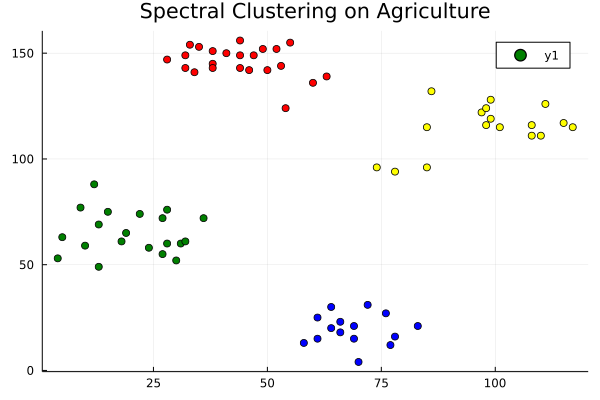

In [8]:
c =["red","blue","green","yellow"]
scatter(data[1, :], data[2, :], 
        color=[c[i] for i in r.assignments],
        title="Spectral Clustering on Agriculture")